# **ANN for Regression with Tensorflow 2.x**

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Create a dataset**

In [0]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

$$y=cos(2x_1)+cos(3x_2)$$
<br>
with $x_1$ and $x_2$ are two uniformly distributed random numbers between $[-3,3]$.

Now, let's plot the data in a 3D scatter plot to visualize it.

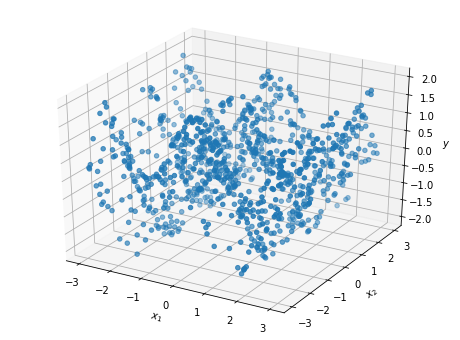

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')
plt.rcParams['figure.figsize'] = [8,6]

## **Build an ANN Model for Regression**

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128,input_shape=(2,), activation='relu',),
                                    tf.keras.layers.Dense(1)
])

Since we are using ANN for regression, we don't need any activation function on output layer. As y is an one-dimensional array, thus we only need one neuron at output layer.

### **Batch vs Minibatch Gradient Descent**
First, let's use the batch Gradient Descent method, the batch size is the entire dataset.

In [0]:
opt = tf.keras.optimizers.Adam(0.08)
model.compile(optimizer = opt, loss='mse')
r = model.fit(X,Y,epochs=100,batch_size=1000)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 238us/sample - loss: 0.0046
Epoch 2/100
1000/1000 [==============================] - 0s 6us/sample - loss: 25.6302
Epoch 3/100
1000/1000 [==============================] - 0s 6us/sample - loss: 1.5483
Epoch 4/100
1000/1000 [==============================] - 0s 7us/sample - loss: 6.2690
Epoch 5/100
1000/1000 [==============================] - 0s 7us/sample - loss: 13.1689
Epoch 6/100
1000/1000 [==============================] - 0s 5us/sample - loss: 8.8023
Epoch 7/100
1000/1000 [==============================] - 0s 6us/sample - loss: 2.6466
Epoch 8/100
1000/1000 [==============================] - 0s 6us/sample - loss: 0.3872
Epoch 9/100
1000/1000 [==============================] - 0s 6us/sample - loss: 1.8856
Epoch 10/100
1000/1000 [==============================] - 0s 6us/sample - loss: 4.1465
Epoch 11/100
1000/1000 [==============================] - 0s 6us/sample - loss: 4.9336
Epoch 12/100
1000/1000 [==

Text(0, 0.5, 'loss (MSE)')

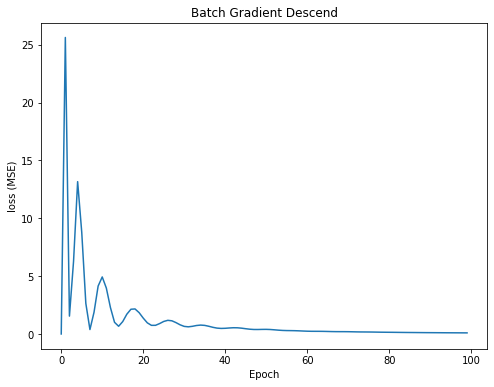

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.title('Batch Gradient Descend')
plt.xlabel('Epoch')
plt.ylabel('loss (MSE)')

We defined the optimizatin algorithm as 'Adam' with learning rate 0.08. We train the model by using batch Gradient Descent method. As I defined the batch size is 1000 the entire dataset, which means the model will update the its weight after calculate the loss for entire dataser. We can see that the loss is decresing but very slow, after 99 epoches, the loss is smaller than 0.1

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128,input_shape=(2,), activation='relu',),
                                    tf.keras.layers.Dense(1)
])

In [0]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss='mse')
r = model.fit(X,Y,epochs=100,batch_size=32)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 347us/sample - loss: 0.9216
Epoch 2/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.8582
Epoch 3/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.8693
Epoch 4/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.8443
Epoch 5/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.8134
Epoch 6/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.7950
Epoch 7/100
1000/1000 [==============================] - 0s 66us/sample - loss: 0.7450
Epoch 8/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.7456
Epoch 9/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.6452
Epoch 10/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.6100
Epoch 11/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5999
Epoch 12/100
1000/

Text(0, 0.5, 'loss (MSE)')

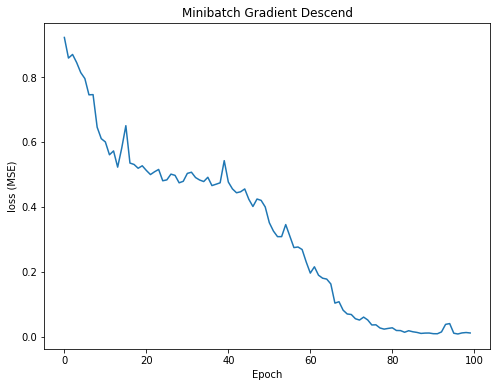

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.title('Minibatch Gradient Descend')
plt.xlabel('Epoch')
plt.ylabel('loss (MSE)')

We defined the optimizatin algorithm as 'Adam' with smaller learning rate 0.01. This time we training the model using Minibatch Gradient Descent method. As I defined the batch size is 5, which means for every 5 samples, the model will update the its weight. We can see that the loss is smaller than 0.1 after 68 epoches. That means, for Minibatch Gradient Descent method the model can be well trained with a smaller learning rate (stable) and less epoches (faster).

Next we will, plot the prediction surface of the well trained model.

In [0]:
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
print('xx\n',xx)
print('yy\n',yy)

xx
 [[-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 ...
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]]
yy
 [[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.87755102 -2.87755102 -2.87755102 ... -2.87755102 -2.87755102
  -2.87755102]
 [-2.75510204 -2.75510204 -2.75510204 ... -2.75510204 -2.75510204
  -2.75510204]
 ...
 [ 2.75510204  2.75510204  2.75510204 ...  2.75510204  2.75510204
   2.75510204]
 [ 2.87755102  2.87755102  2.87755102 ...  2.87755102  2.87755102
   2.87755102]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]


In [0]:
print(xx.flatten().shape)
np.shape((xx.flatten(),xx.flatten()))

(2500,)


(2, 2500)

In [0]:
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
print(Xgrid)
Xgrid.shape

[[-3.         -3.        ]
 [-2.87755102 -3.        ]
 [-2.75510204 -3.        ]
 ...
 [ 2.75510204  3.        ]
 [ 2.87755102  3.        ]
 [ 3.          3.        ]]


(2500, 2)

In [0]:
Yhat = model.predict(Xgrid)
Yhat.shape

(2500, 1)

In [0]:
Yhat = Yhat.flatten()
Yhat.shape

(2500,)

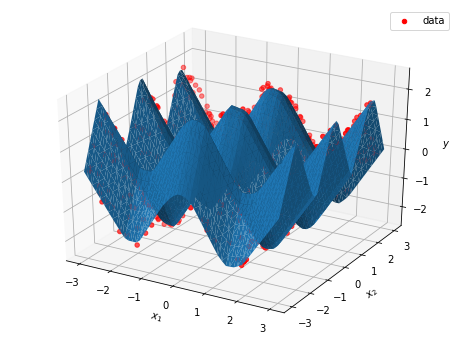

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y,c='r',label='data')

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.3, antialiased=True)
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')
plt.rcParams['figure.figsize'] = [8,6]
plt.legend()
plt.show()

At last step, let's try if ANN can learn the periodicity of the original function, since the cos function can be extended to +/- infinite.

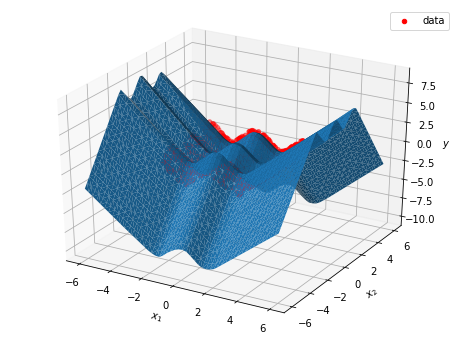

In [0]:
line = np.linspace(-6,6,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y,c='r',label='data')

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.3, antialiased=True)
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')
plt.rcParams['figure.figsize'] = [8,6]
plt.legend()
plt.show()

Unfortunately, the ANN can not learn the periodicity of the function. In another word, it can only learn what you provided, unless, you add a periodic function into the model.

In summary, we use ANN for regression purpose and it works. In the ANN training part, we compared two different strategies, batch gradient descend and minibatch gradient descend. Compare these two methods, the minibatch gradient descend is more likely to be trained stable and faster with proper tuning of its hyperparameter: learning rate and batch size.

## **Reference**


1. https://www.tensorflow.org/tutorials/keras/regression
2. Udemy Tensorflow 2.0: Deep Learning and Artificial Intelligence
3. [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)


